In [1]:
%cd /mnt/hdd1/jkliu/Projects/ATGEmpirical/

/mnt/hdd1/jkliu/Projects/ATGEmpirical


/mnt/hdd1/jkliu/Projects/ATGEmpirical/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
analysis_result_dir = f"summary/data_analysis/first_round_no_internet/"

In [3]:
import matplotlib.pyplot as plt


def violin_plot(result_dict: dict, file_name: str = None, log_scale: bool = True, show_prop: bool = False):
    print("Plotting violin plot")
    plt.rcParams["font.size"] = 12
    plt.rcParams["font.family"] = "sans-serif"
    plt.figure(figsize=(8, 10))
    tools = list(result_dict.keys())
    values = list(result_dict.values())
    plt.figure()
    plt.violinplot(values, showmeans=True, showextrema=False)
    plt.xticks(range(1, len(tools) + 1), tools)
    if log_scale:
        plt.yscale('log')
    plt.xticks(rotation=45)
    if show_prop:
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    if file_name is not None:
        plt.savefig(file_name, bbox_inches='tight')
    plt.show()

In [4]:
from scipy.stats import mannwhitneyu
from effect_size_analysis import cliff_delta


def statistic_test(df: dict, exclude: list):
    print("Statistical test")
    for key1 in df.keys():
        if key1 in exclude:
            continue
        values1 = df[key1]
        for key2 in df.keys():
            if key2 in exclude:
                continue
            if key1 == key2:
                continue
            values2 = df[key2]
            res = mannwhitneyu(values1, values2)
            pvalue = res.pvalue
            if pvalue > 0.05:
                continue
            cliff = cliff_delta.cliff_delta(s1=values1, s2=values2, alpha=0.05, accurate_ci=True)
            delta = cliff[0]
            if delta < 0.11 and delta > -0.11:
                continue
            print(f"{key1} vs {key2} {pvalue} {delta}")


In [5]:
import numpy as np

def statistic_values(df: dict):
    print("Statistical values")
    for key in df.keys():
        values = df[key]
        print(f"{key} {np.mean(values)} {np.median(values)} {np.max(values)} {np.min(values)} {np.std(values)}")


Plotting violin plot


<Figure size 800x1000 with 0 Axes>

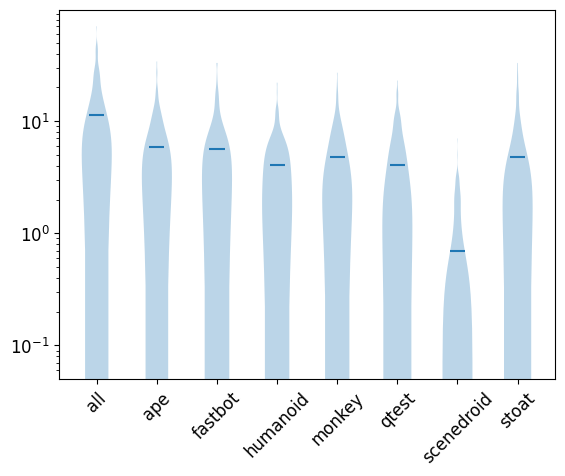

Statistical test
ape vs humanoid 0.03394351185036305 0.16234630746338788
ape vs qtest 0.008469253962625694 0.20134701229540292
ape vs scenedroid 9.169749247389302e-22 0.7112538178400815
ape vs stoat 0.011156326373604326 0.19437700681337614
fastbot vs scenedroid 6.1419204303521205e-18 0.6338789255227504
humanoid vs ape 0.03394351185036305 -0.16234630746338788
humanoid vs scenedroid 6.249552205612906e-20 0.6796146918317801
monkey vs scenedroid 3.1253378138916245e-20 0.6858798652987704
qtest vs ape 0.008469253962625694 -0.20134701229540292
qtest vs scenedroid 5.976227057756756e-14 0.5505521184117785
scenedroid vs ape 9.169749247389302e-22 -0.7112538178400815
scenedroid vs fastbot 6.1419204303521205e-18 -0.6338789255227504
scenedroid vs humanoid 6.249552205612906e-20 -0.6796146918317801
scenedroid vs monkey 3.1253378138916245e-20 -0.6858798652987704
scenedroid vs qtest 5.976227057756756e-14 -0.5505521184117785
scenedroid vs stoat 1.3906382818276793e-15 -0.5897094525804684
stoat vs ape 0.01

In [6]:
import pandas as pd

transition_size_file = f"{analysis_result_dir}/transition_size.csv"

with open(transition_size_file, 'r') as f:
    transition_size = pd.read_csv(f, index_col=False, usecols=["ape", "humanoid", "qtest", "stoat", "fastbot", "monkey",
                                                               "scenedroid", "all"]).sort_index(axis=1)

transition_size.fillna(0, inplace=True)
transition_size_dict = transition_size.to_dict(orient='list')

violin_plot(transition_size_dict, file_name=f"{analysis_result_dir}/transition_size_violin.pdf", log_scale=True)
statistic_test(transition_size, exclude=["all"])
statistic_values(transition_size)

Plotting violin plot


<Figure size 800x1000 with 0 Axes>

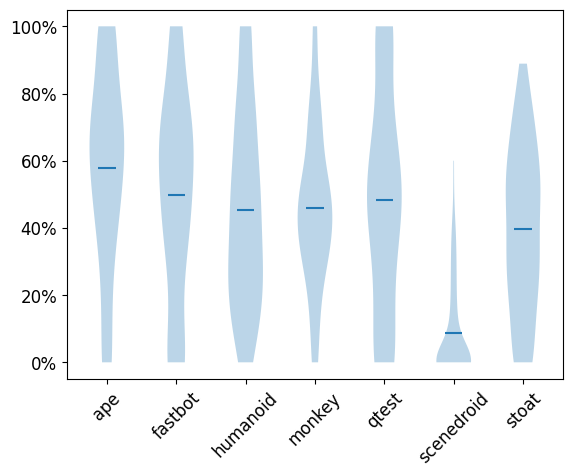

Statistical test
ape vs humanoid 0.0010825465950555257 0.2620192307692308
ape vs monkey 0.00028471224158548036 0.29086538461538464
ape vs qtest 0.01676874273398987 0.19147559171597633
ape vs scenedroid 3.4290421439924546e-26 0.830159023668639
ape vs stoat 2.70135270867913e-06 0.3762019230769231
fastbot vs scenedroid 1.8635973153454503e-20 0.720784023668639
fastbot vs stoat 0.0071122414894825865 0.21569896449704143
humanoid vs ape 0.0010825465950555257 -0.2620192307692308
humanoid vs scenedroid 9.96216971539936e-23 0.772189349112426
monkey vs ape 0.00028471224158548036 -0.29086538461538464
monkey vs scenedroid 9.815963523100383e-26 0.8250739644970414
qtest vs ape 0.01676874273398987 -0.19147559171597633
qtest vs scenedroid 2.2598420761297093e-19 0.6996116863905325
scenedroid vs ape 3.4290421439924546e-26 -0.830159023668639
scenedroid vs fastbot 1.8635973153454503e-20 -0.720784023668639
scenedroid vs humanoid 9.96216971539936e-23 -0.772189349112426
scenedroid vs monkey 9.815963523100383e

In [7]:
import pandas as pd

file = f"{analysis_result_dir}/covered_proportions.csv"

with open(file, 'r') as f:
    proportions = pd.read_csv(f, index_col=False, usecols=["ape", "humanoid", "qtest", "stoat", "fastbot", "monkey",
                                                           "scenedroid", "all"]).sort_index(axis=1)

proportions.fillna(0, inplace=True)
proportions.pop("all")
proportions_dict = proportions.to_dict(orient='list')

violin_plot(proportions_dict, file_name=f"{analysis_result_dir}/transition_prop_violin.pdf", log_scale=False, show_prop=True)
statistic_test(proportions, exclude=["all"])
statistic_values(proportions)

Plotting violin plot


<Figure size 800x1000 with 0 Axes>

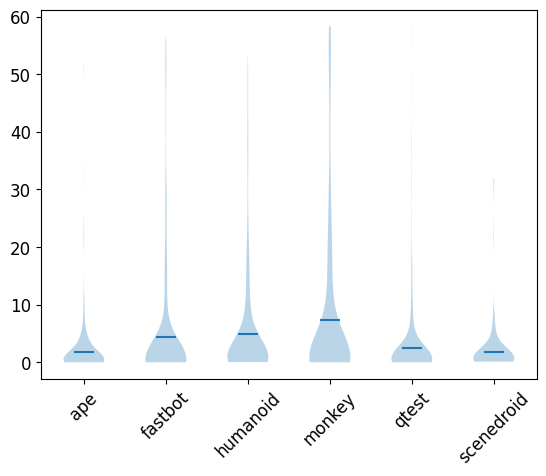

Statistical test
ape vs humanoid 1.2826727570947811e-11 -0.28285515015589957
ape vs monkey 0.003998953267860003 -0.11849420236141261
ape vs scenedroid 0.0013265767954924739 -0.183993399339934
fastbot vs humanoid 2.5177800923373794e-10 -0.2722074755393685
fastbot vs scenedroid 0.00031936944888309396 -0.209579971032485
humanoid vs ape 1.2826727570947811e-11 0.28285515015589957
humanoid vs fastbot 2.5177800923373794e-10 0.2722074755393685
humanoid vs monkey 0.0018741815109955358 0.13231601028156115
humanoid vs qtest 7.899475874346396e-09 0.25865742245332757
humanoid vs scenedroid 0.03861167394199828 0.1205647636586863
monkey vs ape 0.003998953267860003 0.11849420236141261
monkey vs humanoid 0.0018741815109955358 -0.13231601028156115
monkey vs qtest 0.005553906519963616 0.12233931005557303
qtest vs humanoid 7.899475874346396e-09 -0.25865742245332757
qtest vs monkey 0.005553906519963616 -0.12233931005557303
qtest vs scenedroid 0.009437151903598368 -0.15449043815056887
scenedroid vs ape 0.00

In [8]:
import pandas as pd
import math

file = f"{analysis_result_dir}/activity_times.csv"

with open(file, 'r') as f:
    temp_df = pd.read_csv(f, index_col=0)

proportions = temp_df.T
proportions_dict_raw = proportions.to_dict(orient='list')
proportions_dict = {}
for key in proportions_dict_raw:
    # if x is not nan
    proportions_dict[key] = [x for x in proportions_dict_raw[key] if not math.isnan(x)]

proportions_dict.pop('stoat')
violin_plot(proportions_dict, file_name=f"{analysis_result_dir}/activity_times.pdf", log_scale=False)
statistic_test(proportions_dict, exclude=["all"])
statistic_values(proportions_dict)

Plotting violin plot


<Figure size 800x1000 with 0 Axes>

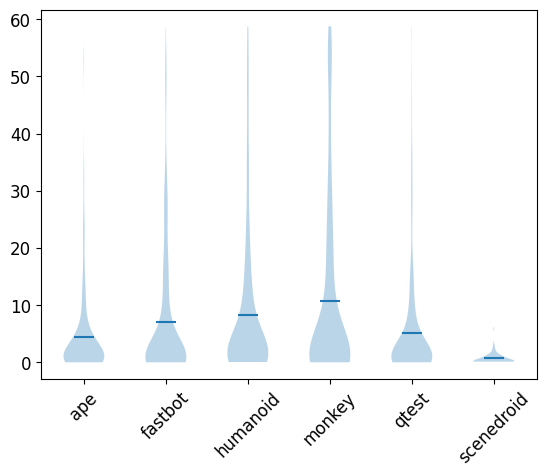

Statistical test
ape vs humanoid 3.495115919229792e-07 -0.17937472861485018
ape vs monkey 0.0005849979251268551 -0.11533706845710656
ape vs scenedroid 1.6166331925268682e-07 0.36006694625062524
fastbot vs humanoid 7.358488823371026e-05 -0.14080562860277598
fastbot vs scenedroid 1.883534536921517e-05 0.294770206022187
humanoid vs ape 3.495115919229792e-07 0.17937472861485018
humanoid vs fastbot 7.358488823371026e-05 0.14080562860277598
humanoid vs qtest 2.3346399524959633e-06 0.18009609438180868
humanoid vs scenedroid 4.532447081183234e-14 0.5314508276533593
monkey vs ape 0.0005849979251268551 0.11533706845710656
monkey vs qtest 0.0009753383617572746 0.12056600116301609
monkey vs scenedroid 1.7188353453706575e-05 0.29879085584734555
qtest vs humanoid 2.3346399524959633e-06 -0.18009609438180868
qtest vs monkey 0.0009753383617572746 -0.12056600116301609
qtest vs scenedroid 2.760239350677363e-07 0.36089648747876596
scenedroid vs ape 1.6166331925268682e-07 -0.36006694625062524
scenedroid vs

In [9]:
import pandas as pd
import math

file = f"{analysis_result_dir}/transition_times.csv"

with open(file, 'r') as f:
    temp_df = pd.read_csv(f, index_col=0)

proportions = temp_df.T
proportions_dict_raw = proportions.to_dict(orient='list')
proportions_dict = {}
for key in proportions_dict_raw:
    # if x is not nan
    proportions_dict[key] = [x for x in proportions_dict_raw[key] if not math.isnan(x)]

proportions_dict.pop('stoat')
violin_plot(proportions_dict, file_name=f"{analysis_result_dir}/transition_times.pdf", log_scale=False)
statistic_test(proportions_dict, exclude=["all"])
statistic_values(proportions_dict)

In [10]:

from core.file_paths import *

file = f"{analysis_result_dir}/all_transitions.txt"

transition_dict = {}
for tool in tools:
    transition_dict[tool] = set()
    
tool_name = ""
transitions = set()
with open(file, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if "All results" in line:
            continue
        if "APK:" in line:
            continue
        if "Start ->" in line:
            continue
        if "Tool:" in line:
            new_tool_name = line.split("Tool:")[1].strip()
            if tool_name in transition_dict:
                transition_dict[tool_name].update(transitions)
            tool_name = new_tool_name
            transitions = set()
            continue
        transitions.add(line.strip())


for tool, values in transition_dict.items():
    print(tool, len(values))


Updated PATH: /usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/mnt/hdd1/jkliu/Applications/ncurses  # 你自己的 ncurses 目录/bin:/mnt/hdd1/jkliu/Applications/zsh/bin:/mnt/hdd1/jkliu/Applications/Android/cmdline-tools/latest/bin:/mnt/hdd1/jkliu/Applications/Android/emulator:/mnt/hdd1/jkliu/Applications/Android/platform-tools:/mnt/hdd1/jkliu/Applications/Android/tools:/mnt/hdd1/jkliu/Applications/Android/tools/bin:/mnt/hdd1/jkliu/Applications/Android/build-tools/35.0.0
/mnt/hdd1/jkliu/Applications/Android/build-tools/35.0.0/aapt
Successfully added aapt to PATH
ape 548
fastbot 541
humanoid 356
monkey 437
qtest 375
scenedroid 40
stoat 519


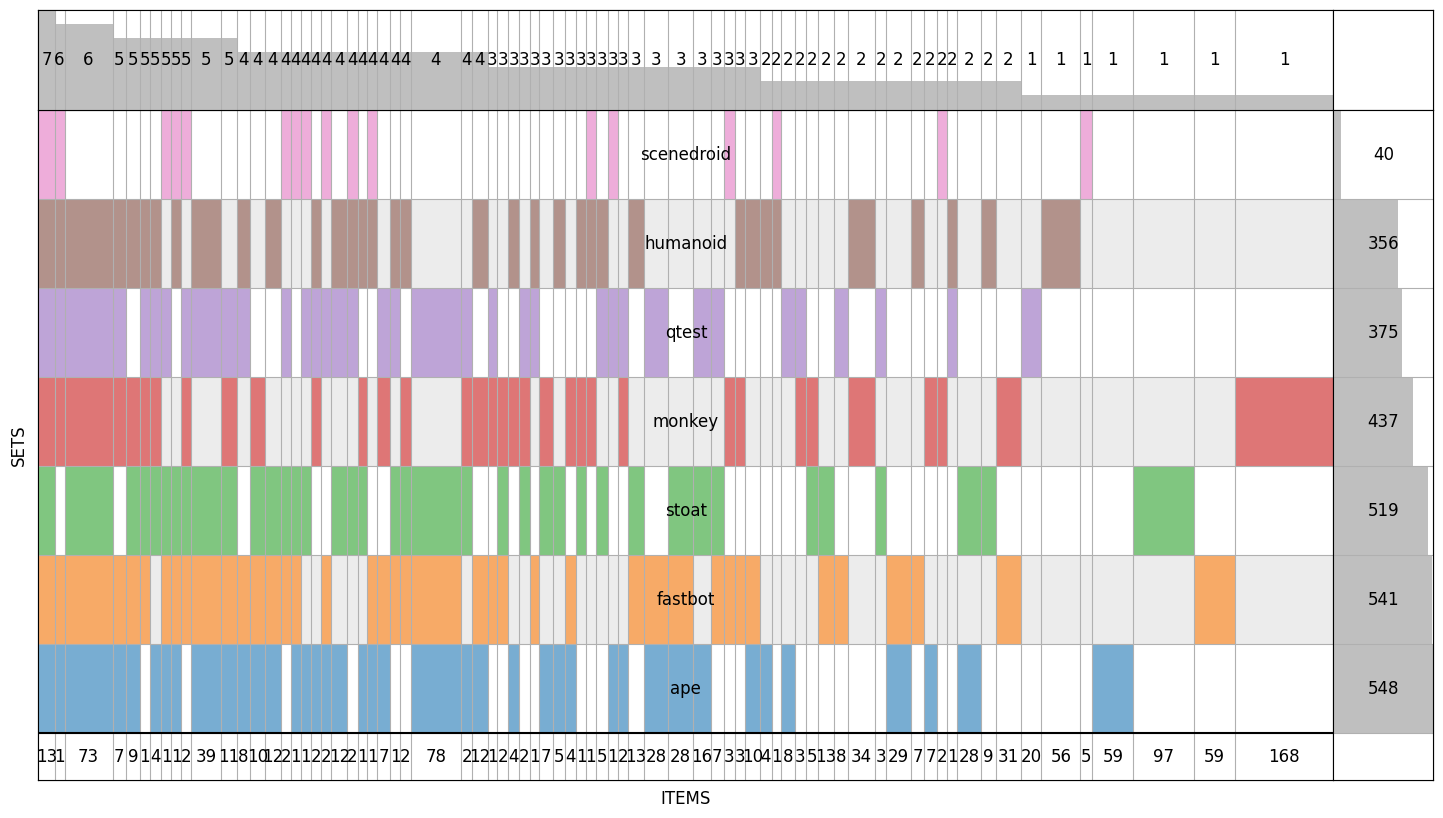

In [11]:
from supervenn import supervenn
# plt.rcParams["font.size"] = 20
plt.figure(figsize=(18, 10))
# plt.rcParams.update({'font.size': 100})
plt.rcParams.update({'font.family': 'sans-serif'})

labels = tools
sets = [transition_dict[tool] for tool in tools]
supervenn(sets, labels, chunks_ordering='occurrence', widths_minmax_ratio=0.1, sets_ordering="size")
plt.savefig(f"{analysis_result_dir}/transition_supervenn.pdf", bbox_inches='tight')